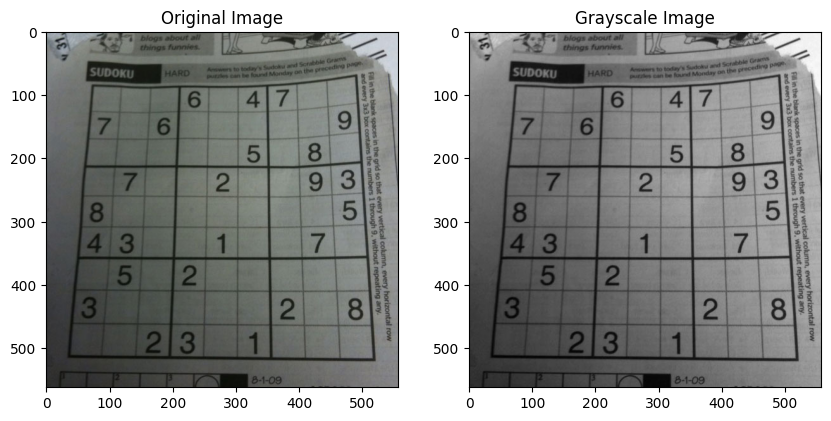

In [3]:
import cv2
import matplotlib.pyplot as plt
import urllib.request

# Download a sample image from GitHub (uneven lighting text example)
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png"
urllib.request.urlretrieve(url, "uneven_illumination.jpg")

# Read and convert to grayscale
image = cv2.imread("uneven_illumination.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()


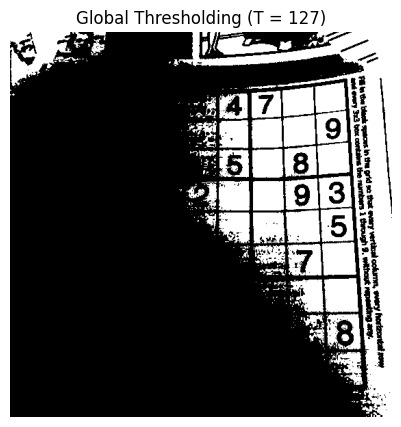

✅ Global thresholding applied successfully.


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Global thresholding (single intensity value)
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6,5))
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding (T = 127)")
plt.axis('off')
plt.show()

print("✅ Global thresholding applied successfully.")


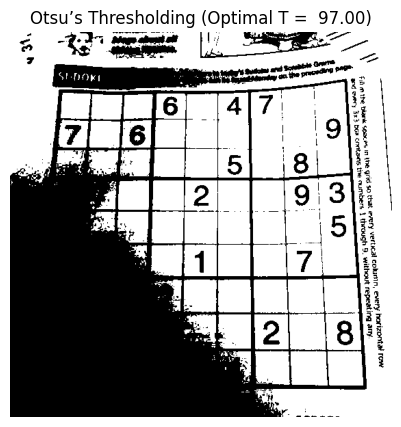

✅ Otsu’s thresholding applied successfully. Optimal threshold value: 97.00


In [5]:
# Otsu’s thresholding automatically determines the optimal threshold
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(6,5))
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu’s Thresholding (Optimal T = {_: .2f})")
plt.axis('off')
plt.show()

print(f"✅ Otsu’s thresholding applied successfully. Optimal threshold value: {_:.2f}")


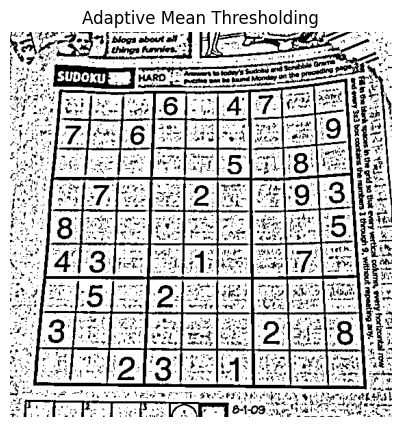

✅ Adaptive mean thresholding applied successfully.


In [6]:
# Adaptive Mean Thresholding computes threshold per local block using mean intensity
adaptive_mean = cv2.adaptiveThreshold(gray, 255,
                                      cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY,
                                      blockSize=11,  # neighborhood size (must be odd)
                                      C=2)           # fine-tune for brightness offset

plt.figure(figsize=(6,5))
plt.imshow(adaptive_mean, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')
plt.show()

print("✅ Adaptive mean thresholding applied successfully.")


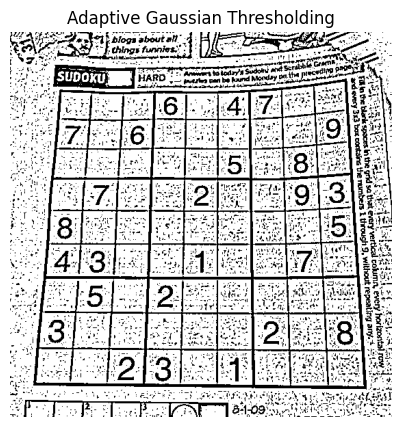

✅ Adaptive Gaussian thresholding applied successfully.


In [7]:
# Adaptive Gaussian Thresholding computes weighted local thresholds using Gaussian window
adaptive_gauss = cv2.adaptiveThreshold(gray, 255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       blockSize=11,
                                       C=2)

plt.figure(figsize=(6,5))
plt.imshow(adaptive_gauss, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')
plt.show()

print("✅ Adaptive Gaussian thresholding applied successfully.")


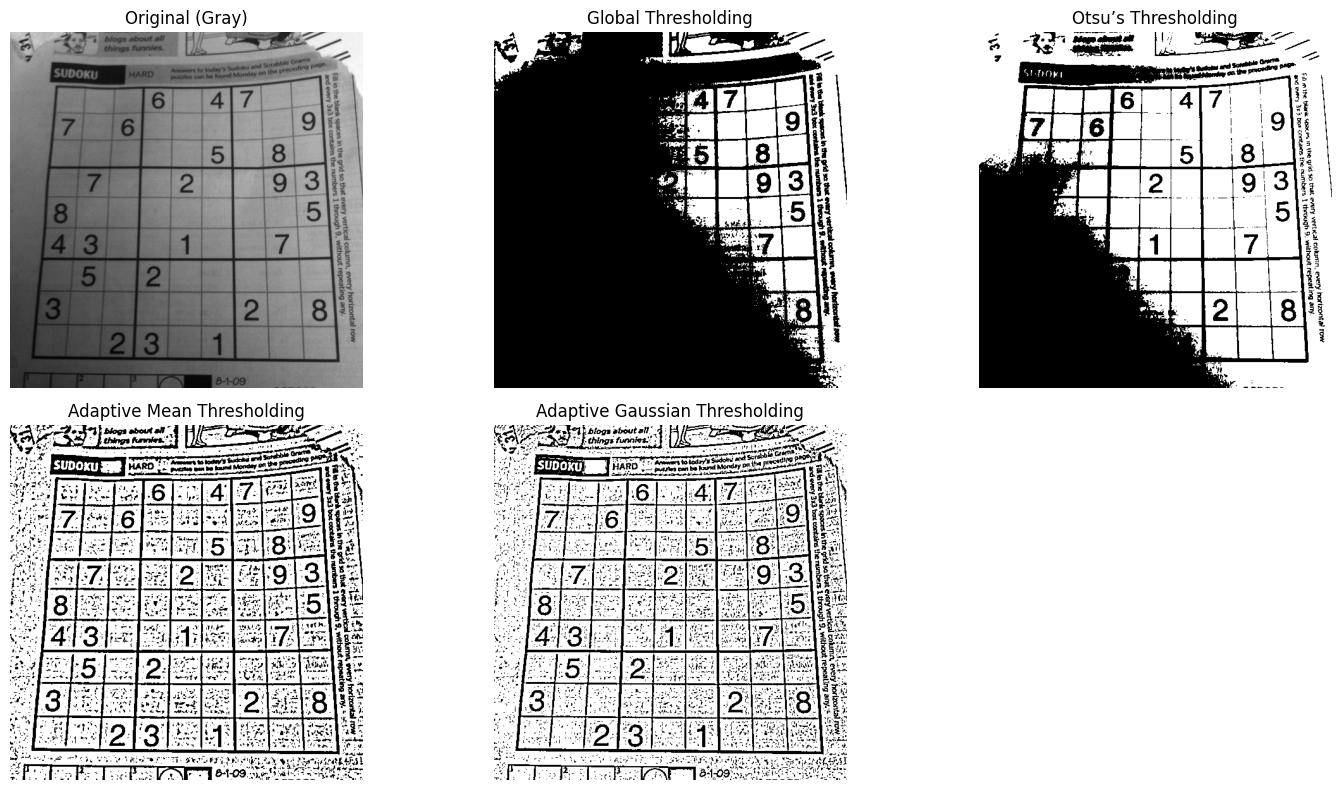

🧮 Pixel Statistics (White vs Black pixels)

1. Global Thresholding            → White: 81,824 | Black: 232,330
2. Otsu’s Thresholding            → White: 185,293 | Black: 128,861
3. Adaptive Mean Thresholding     → White: 234,221 | Black: 79,933
4. Adaptive Gaussian Thresholding → White: 244,301 | Black: 69,853


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare comparison data ---
titles = [
    "Original (Gray)",
    "Global Thresholding",
    "Otsu’s Thresholding",
    "Adaptive Mean Thresholding",
    "Adaptive Gaussian Thresholding"
]

images = [gray, global_thresh, otsu_thresh, adaptive_mean, adaptive_gauss]

# --- Compute simple pixel stats ---
def get_stats(img):
    white_pixels = np.sum(img == 255)
    black_pixels = np.sum(img == 0)
    return white_pixels, black_pixels

stats = [get_stats(img) for img in images[1:]]  # exclude original

# --- Display all results ---
plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Display comparison statistics ---
print("🧮 Pixel Statistics (White vs Black pixels)\n")
for i, (title, (white, black)) in enumerate(zip(titles[1:], stats), start=1):
    print(f"{i}. {title:<30} → White: {white:,} | Black: {black:,}")
